<h1>Progetto Strumenti di Programmazione Python - Rinaldi Michele M.

Master in Data Science and Big Data Analytics</h1><h2>STATISTICHE DESCRITTIVE CALCISTICHE</h2>


## Import pacchetto .py

Il progetto ha la forma di un pacchetto python, il cui nome è *project* e al cui interno vi è il modulo **rinaldi.py**:
- si procede, pertanto, ad importare il pacchetto con la sintassi riportata nella cella sottostante;
- per prima cosa, verrà chiesto all'utente di inserire come *input* il percorso completo della cartella dove si desidera salvare il *dataset* da ricercare;
- il percorso verrà salvato nella variabile del modulo.py **dataset_path** e la cartella indicata sarà considerata di *default* in molte funzioni nel prosieguo dell'analisi.

In [1]:
import project.rinaldi

The complete path folder you choosed is: C:\Users\HP Michele\Desktop\Master Big Data Analytics\Strumenti_di_Programmazione_Python\packages\project; 
it is now stored within the rinaldi.py variable: dataset_path


### 1. Scaricare uno o più dataset tramite una API, salvare i dati e leggere il dataset

Il primo punto del progetto è soddisfatto mediante l'utilizzo delle seguenti tre funzioni:

- **data_search()**, che consente di effettuare una ricerca di *datasets* mediante utilizzo della Kaggle Api con inserimento di **parole chiave** o **url**
relative alla tipologia di *dataset* ricercato (nel caso in esame, sono state inserite le parole chiave "*international football 1872 40,000*");

- **data_saving(data_search, path)**, che consente di salvare i *datasets* trovati con la funzione *data_search()*, rinominandoli secondo le preferenze dell'utente, all'interno della cartella il cui percorso è da indicare nel parametro *path*, che risulta settato sul valore di *default* della variabile *dataset_path* immesso nell'inizializzazione della cella precedente;

- **data_reading(name, path)**, che consente di leggere il *dataset* scaricato in locale, passando come parametri il nome *name* del *dataset* (senza formato) e il percorso *path*, anch'esso settato sul valore di *default* della variabile *dataset_path* immesso nell'inizializzazione della cella precedente.

In [2]:
df_search = project.rinaldi.data_search()

Datasets found: results.csv


In [3]:
df_save = project.rinaldi.data_saving(df_search)

Successfully renamed file: results.csv, in: soccer.csv


Qualora nella cartella prescelta per il salvataggio del *dataset* vi sia già un file con lo stesso nome che si desidera assegnare al file da scaricare e della stessa estensione, la funzione *data_saving()* non potrà effettuare la rinominazione e verrà sollevata la seguente eccezione:

In [4]:
project.rinaldi.data_saving(df_search)

ValueError: Error: impossible rename file results.csv

In [5]:
df_read = project.rinaldi.data_reading('soccer')
display(df_read)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
41581,2020-01-10,Barbados,Canada,1,4,Friendly,Irvine,United States,True
41582,2020-01-12,Kosovo,Sweden,0,1,Friendly,Doha,Qatar,True
41583,2020-01-15,Canada,Iceland,0,1,Friendly,Irvine,United States,True
41584,2020-01-19,El Salvador,Iceland,0,1,Friendly,Carson,United States,True


Qualora il nome o il percorso passati come parametro in *data_reading(name, path)* non siano corretti, la funzione non potrà aprire alcun file e verrà sollevata la seguente eccezione:

In [6]:
df_read = project.rinaldi.data_reading('fake_name')
df_read

ValueError: File name: fake_name does not exist or file path: C:\Users\HP Michele\Desktop\Master Big Data Analytics\Strumenti_di_Programmazione_Python\packages\project is wrong

### 2. Memorizzazione permanente della configurazione per l’accesso allo strumento utilizzato per la memorizzazione dei risultati delle analisi

Il secondo punto del progetto è assicurato mediante l'utilizzo della funzione **settings(analysis_storage_file_name, analysis_storage_path)**, che consente di creare una memoria permanente per le due impostazioni personalizzate previste per l'utente nell'utilizzo del programma:
- l'assegnazione del nome *analysis_storage_file_name* dello strumento utilizzato per la memorizzazione dei risultati delle analisi;
- l'assegnazione del percorso *analysis_storage_path* dello strumento utilizzato per la memorizzazione dei risultati delle analisi.

Tale memoria permanente è creata nella forma di un file di testo dal nome *configuration.txt* all'interno del modulo **rinaldi.py**.

Per semplicità, entrambi i parametri sono settati, rispettivamente, sui valori di *default*: 
- *analyses_results*;
- percorso assegnato alla variabile *dataset_path* immesso nell'inizializzazione del programma.

In [7]:
project.rinaldi.settings()

Successfully created settings file: configuration.txt


### 3. Selezionare diversi sottoinsiemi di dati

Il terzo punto del progetto è assicurato mediante l'utilizzo della funzione **subset_genesis(data_reading, year, column_name, row_name)**, che consente di creare uno o più *subsets* a partire dal *dataset* originale. I valori di default dei parametri, da passare sotto forma di tipo **stringa**, sono settati come di seguito specificato:
- *year*: valore di default nullo;

- *column_name*: nome dell'intestazione della colonna della tipologia di torneo come riportata all'interno del *dataset* originale (*tournament*);
- *row_name*: nome di una delle tipologie di torneo come riportata all'interno del *dataset* originale (*FIFA World Cup*).

        Il settaggio del parametro column_name sul valore di default è condizione necessaria per l'abilitazione alle successive analisi !!!

I criteri di creazione dei *subsets* sono i seguenti:

1. se _year_ è uguale al tipo *None*, il *subset* viene creato sul gruppo di nome *row_name* appartenente alla colonna di intestazione *column_name*;

2. se *year* è diverso dal tipo *None*, il *subset* di cui al punto 1. viene filtrato considerando il valore del parametro *year*.

La funzione supporta la possibilità di poter rinominare l'intestazione di una colonna secondo le preferenze dell'utente.

 i. **df_sub_one** mostra tutte le partite dei campionati mondiali disputate nella storia:

In [8]:
df_sub_one = project.rinaldi.subset_genesis(df_read)
display(df_sub_one)

,home_team,away_team,home_score,away_score,tournament,city,country,neutral
date,,,,,,,,
1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True
1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True
1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True
1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True
1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True
...,...,...,...,...,...,...,...,...
2018-07-07,Russia,Croatia,2,2,FIFA World Cup,Sochi,Russia,False
2018-07-10,France,Belgium,1,0,FIFA World Cup,St. Petersburg,Russia,True
2018-07-11,Croatia,England,2,1,FIFA World Cup,Moscow,Russia,True


 ii. **df_sub_two** mostra tutte le partite del mondiale del 2006:

In [9]:
df_sub_two = project.rinaldi.subset_genesis(df_read,'2006')
display(df_sub_two)

,home_team,away_team,home_score,away_score,tournament,city,country,neutral
date,,,,,,,,
2006-06-09,Germany,Costa Rica,4,2,FIFA World Cup,Munich,Germany,False
2006-06-09,Poland,Ecuador,0,2,FIFA World Cup,Gelsenkirchen,Germany,True
2006-06-10,Argentina,Ivory Coast,2,1,FIFA World Cup,Hamburg,Germany,True
2006-06-10,England,Paraguay,1,0,FIFA World Cup,Frankfurt am Main,Germany,True
2006-06-10,Trinidad and Tobago,Sweden,0,0,FIFA World Cup,Dortmund,Germany,True
...,...,...,...,...,...,...,...,...
2006-07-01,England,Portugal,0,0,FIFA World Cup,Gelsenkirchen,Germany,True
2006-07-04,Germany,Italy,0,2,FIFA World Cup,Dortmund,Germany,False
2006-07-05,Portugal,France,0,1,FIFA World Cup,Munich,Germany,True


 iii. **df_sub_three** mostra tutte le partite dell'europeo del 2000:

In [10]:
df_sub_three = project.rinaldi.subset_genesis(df_read,'2000','tournament','UEFA Euro')
display(df_sub_three.head())

,home_team,away_team,home_score,away_score,tournament,city,country,neutral
date,,,,,,,,
2000-06-10,Belgium,Sweden,2,1,UEFA Euro,Brussels,Belgium,False
2000-06-11,France,Denmark,3,0,UEFA Euro,Bruges,Belgium,True
2000-06-11,Netherlands,Czech Republic,1,0,UEFA Euro,Amsterdam,Netherlands,False
2000-06-11,Turkey,Italy,1,2,UEFA Euro,Arnhem,Netherlands,True
2000-06-12,Germany,Romania,1,1,UEFA Euro,Liège,Belgium,True


 iv. **df_sub_four** mostra tutte le partite disputate in casa dall'Italia nell'anno 1982:

In [11]:
df_sub_four = project.rinaldi.subset_genesis(df_read,'1982','home_team','Italy')
display(df_sub_four)

,home_team,away_team,home_score,away_score,tournament,city,country,neutral
date,,,,,,,,
1982-06-14,Italy,Poland,0,0,FIFA World Cup,Vigo,Spain,True
1982-06-18,Italy,Peru,1,1,FIFA World Cup,Vigo,Spain,True
1982-06-23,Italy,Cameroon,1,1,FIFA World Cup,Vigo,Spain,True
1982-06-29,Italy,Argentina,2,1,FIFA World Cup,Barcelona,Spain,True
1982-07-05,Italy,Brazil,3,2,FIFA World Cup,Barcelona,Spain,True
1982-07-11,Italy,Germany,3,1,FIFA World Cup,Madrid,Spain,True
1982-10-27,Italy,Switzerland,0,1,Friendly,Rome,Italy,False
1982-11-13,Italy,Czechoslovakia,2,2,UEFA Euro qualification,Milan,Italy,False
1982-12-04,Italy,Romania,0,0,UEFA Euro qualification,Florence,Italy,False


 v. **df_sub_five** mostra l'eccezione che viene sollevata qualora l'anno inserito non sia stata disputata la competizione ricercata:

In [12]:
df_sub_five = project.rinaldi.subset_genesis(df_read,'1931','tournament','FIFA World Cup')
display(df_sub_five)

NoMatchFound: No matches were played in 1931 for FIFA World Cup tournament

### 4. Analisi dei dati su *subsets*

Il quarto punto del progetto è fornito mediante l'utilizzo della funzione **subset_analysis(subset_genesis)** che, qualora riscontri la presenza dei requisiti richiesti nel *subset* passato come parametro - come specificato al punto 3 - abilita all'esecuzione dell'analisi dei dati che fornisce in *output* i seguenti valori di aggregazione, sotto forma di **dizionario**, per torneo specifico o tipologia di torneo:

 1. **media** dei gol segnati;

 2. **max** dei gol segnati da un *team* - e relativo nome del *team*;

 3. **max** dei gol segnati in una data città - e relativo nome della città;

 4. **min** dei gol segnati da un *team* - e relativo nome del *team*;
 
 5. **min** dei gol segnati in una data città - e relativo nome della città;
 
 
La funzione solleva un'eccezione qualora il *subset* passato come parametro non sia un sottoinsieme raggruppato per una o più competizioni.

 i. **df_a_one** mostra gli esiti delle analisi per le partite dei campionati mondiali disputate nella storia:

In [13]:
df_a_one = project.rinaldi.subset_analysis(df_sub_one)
df_a_one

{'scored goals mean': 2.831,
 'max team scored goals': ('Brazil', 229.0),
 'max city scored goals': ('Montevideo', 41),
 'min team scored goals': ('DR Congo-Trinidad and Tobago-Indonesia-Canada-China PR',
  0.0),
 'min city scored goals': ('Lille-Trieste-Osaka-Örebro-Cagliari-Palermo-Vigo-Natal',
  2)}

 ii. **df_a_two** mostra gli esiti delle analisi per le partite del mondiale del 2006:

In [14]:
df_a_two = project.rinaldi.subset_analysis(df_sub_two)
df_a_two

{'scored goals mean': 2.297,
 'max team scored goals': ('Germany', 14.0),
 'max city scored goals': ('Munich', 13),
 'min team scored goals': ('Trinidad and Tobago', 0.0),
 'min city scored goals': ('Frankfurt am Main-Dortmund', 5)}

 iii. **df_a_three** mostra gli esiti delle analisi per le partite dell'europeo del 2000:

In [15]:
df_a_three = project.rinaldi.subset_analysis(df_sub_three)
df_a_three

{'scored goals mean': 2.742,
 'max team scored goals': ('France-Netherlands', 13.0),
 'max city scored goals': ('Rotterdam', 14),
 'min team scored goals': ('Denmark', 0.0),
 'min city scored goals': ('Arnhem-Liège', 1)}

iv. **df_a_four** mostra l'eccezione che viene sollevata qualora il *subset* da analizzare non sia stato raggruppato per competizione:

In [16]:
df_a_four = project.rinaldi.subset_analysis(df_sub_four)

NoMatchFound: Subset_genesis standards do not meet subset_analysis requirements. Please, set 'tournament' as groupby argument within subset_genesis function

### 5. Salvataggio dei risultati delle analisi dei dati su *subsets*

Il quinto punto del progetto è soddisfatto mediante l'utilizzo della funzione **results_saving(subset_analysis)** che gestisce la creazione di un file di testo in cui vengono salvati i risultati di ogni nuova analisi - fornita in *output* dalla funzione *subset_analysis*, passata come argomento - su una nuova riga, associando a ciascuna *entry* un identificatore univoco (cioè la data e l'orario in cui si effettua il salvataggio). In particolare:

- i parametri del nome e del percorso di salvataggio del file sono stati definiti al **punto 2.** mediante inizializzazione della funzione *settings*, il cui utilizzo è richiesto soltanto al primo avvio del programma;

- la funzione *results_saving* andrà a leggere i parametri memorizzati nelle impostazioni all'interno del file di configurazione creato dalla funzione *settings* e genererà il file di salvataggio dei risultati.

In [17]:
project.rinaldi.results_saving(df_a_one)

Correctly saved analysis results in analyses_results.txt file


In [18]:
project.rinaldi.results_saving(df_a_two)

Correctly saved analysis results in analyses_results.txt file


In [19]:
project.rinaldi.results_saving(df_a_three)

Correctly saved analysis results in analyses_results.txt file


- qualora, per qualsiasi motivo o inavvertitamente, il file di configurazione generato al **punto 2** sia stato cancellato, la funzione *result_saving* non sarà in grado di trovare il percorso dove ricondurre il file per il salvataggio dei dati e verrà sollevata la seguente eccezione:

In [20]:
project.rinaldi.results_saving(df_a_three)

ConfigurationParametersAbsent: Settings file to save analysis results parameters does not exist!!!
Make sure you have created it by using settings function


### 6. Grafici

Il sesto punto del progetto è soddisfatto mediante l'utilizzo delle funzione **plot_genesis(subset_genesis, name)** e **subplots_genesis(data_reading, name, column_name, row_name)** che gestiscono la creazione di due tipologie di grafici, a seconda dei parametri passati come argomento, da poter salvare in un file.png rinominato (*name*) secondo le preferenze dell'utente.

 1. **plot_genesis(subset_genesis, name)**, fornisce in output il grafico della stima *kernel* di densità per i gol segnati e subiti in un dato torneo. Quest'ultimo è il sottoinsieme di dati da passare come parametro, sottoforma di output della funzione *subset_genesis*;
 
 2. **subplots_genesis(data_reading, name, column_name, row_name)**, fornisce in output *n* grafici a barre orizzontali del totale dei gol segnati di ogni squadra nei *matches* giocati:
  - negli *n* tornei di quella competizione sinora giocata, qualora i parametri *column_name* e *row_name* siano settati, rispettivamente, sull'intestazione della colonna della tipologia di torneo (di default, *tournament*) e su un determinato torneo (di default, *FIFA World Cup*);
 - negli *n* anni in cui si è svolta anche solo una partita in qualsiasi competizione, qualora i parametri *column_name* e *row_name* vengano settati su *None*.

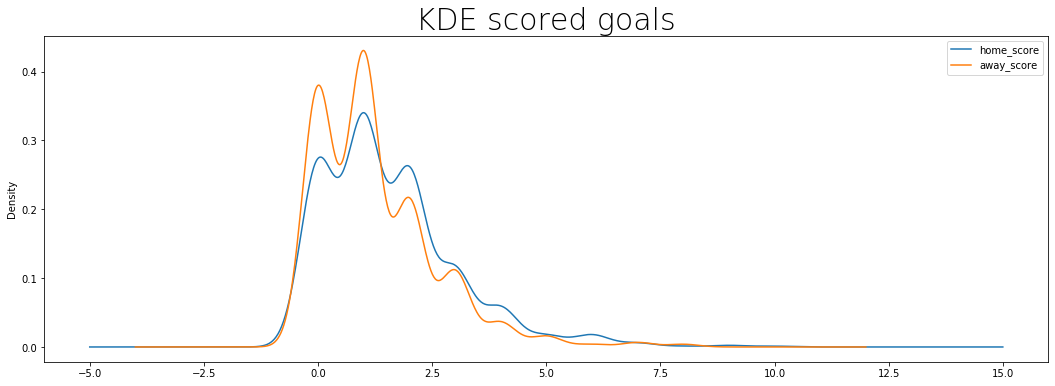

In [21]:
pl_gen_one = project.rinaldi.plot_genesis(df_sub_one)

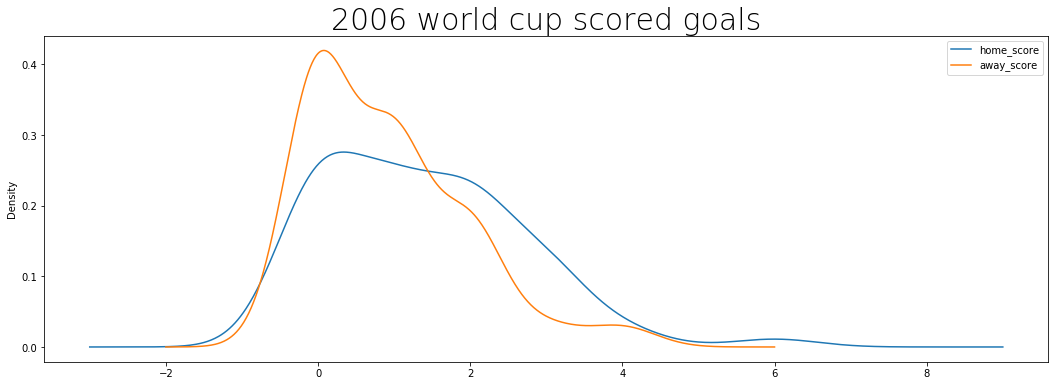

In [22]:
pl_gen_two = project.rinaldi.plot_genesis(df_sub_two,"2006 world cup")

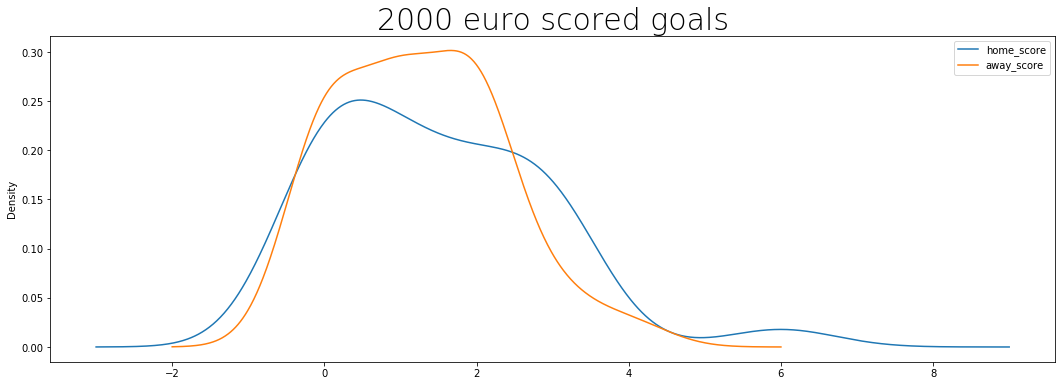

In [23]:
pl_gen_three = project.rinaldi.plot_genesis(df_sub_three,"2000 euro")

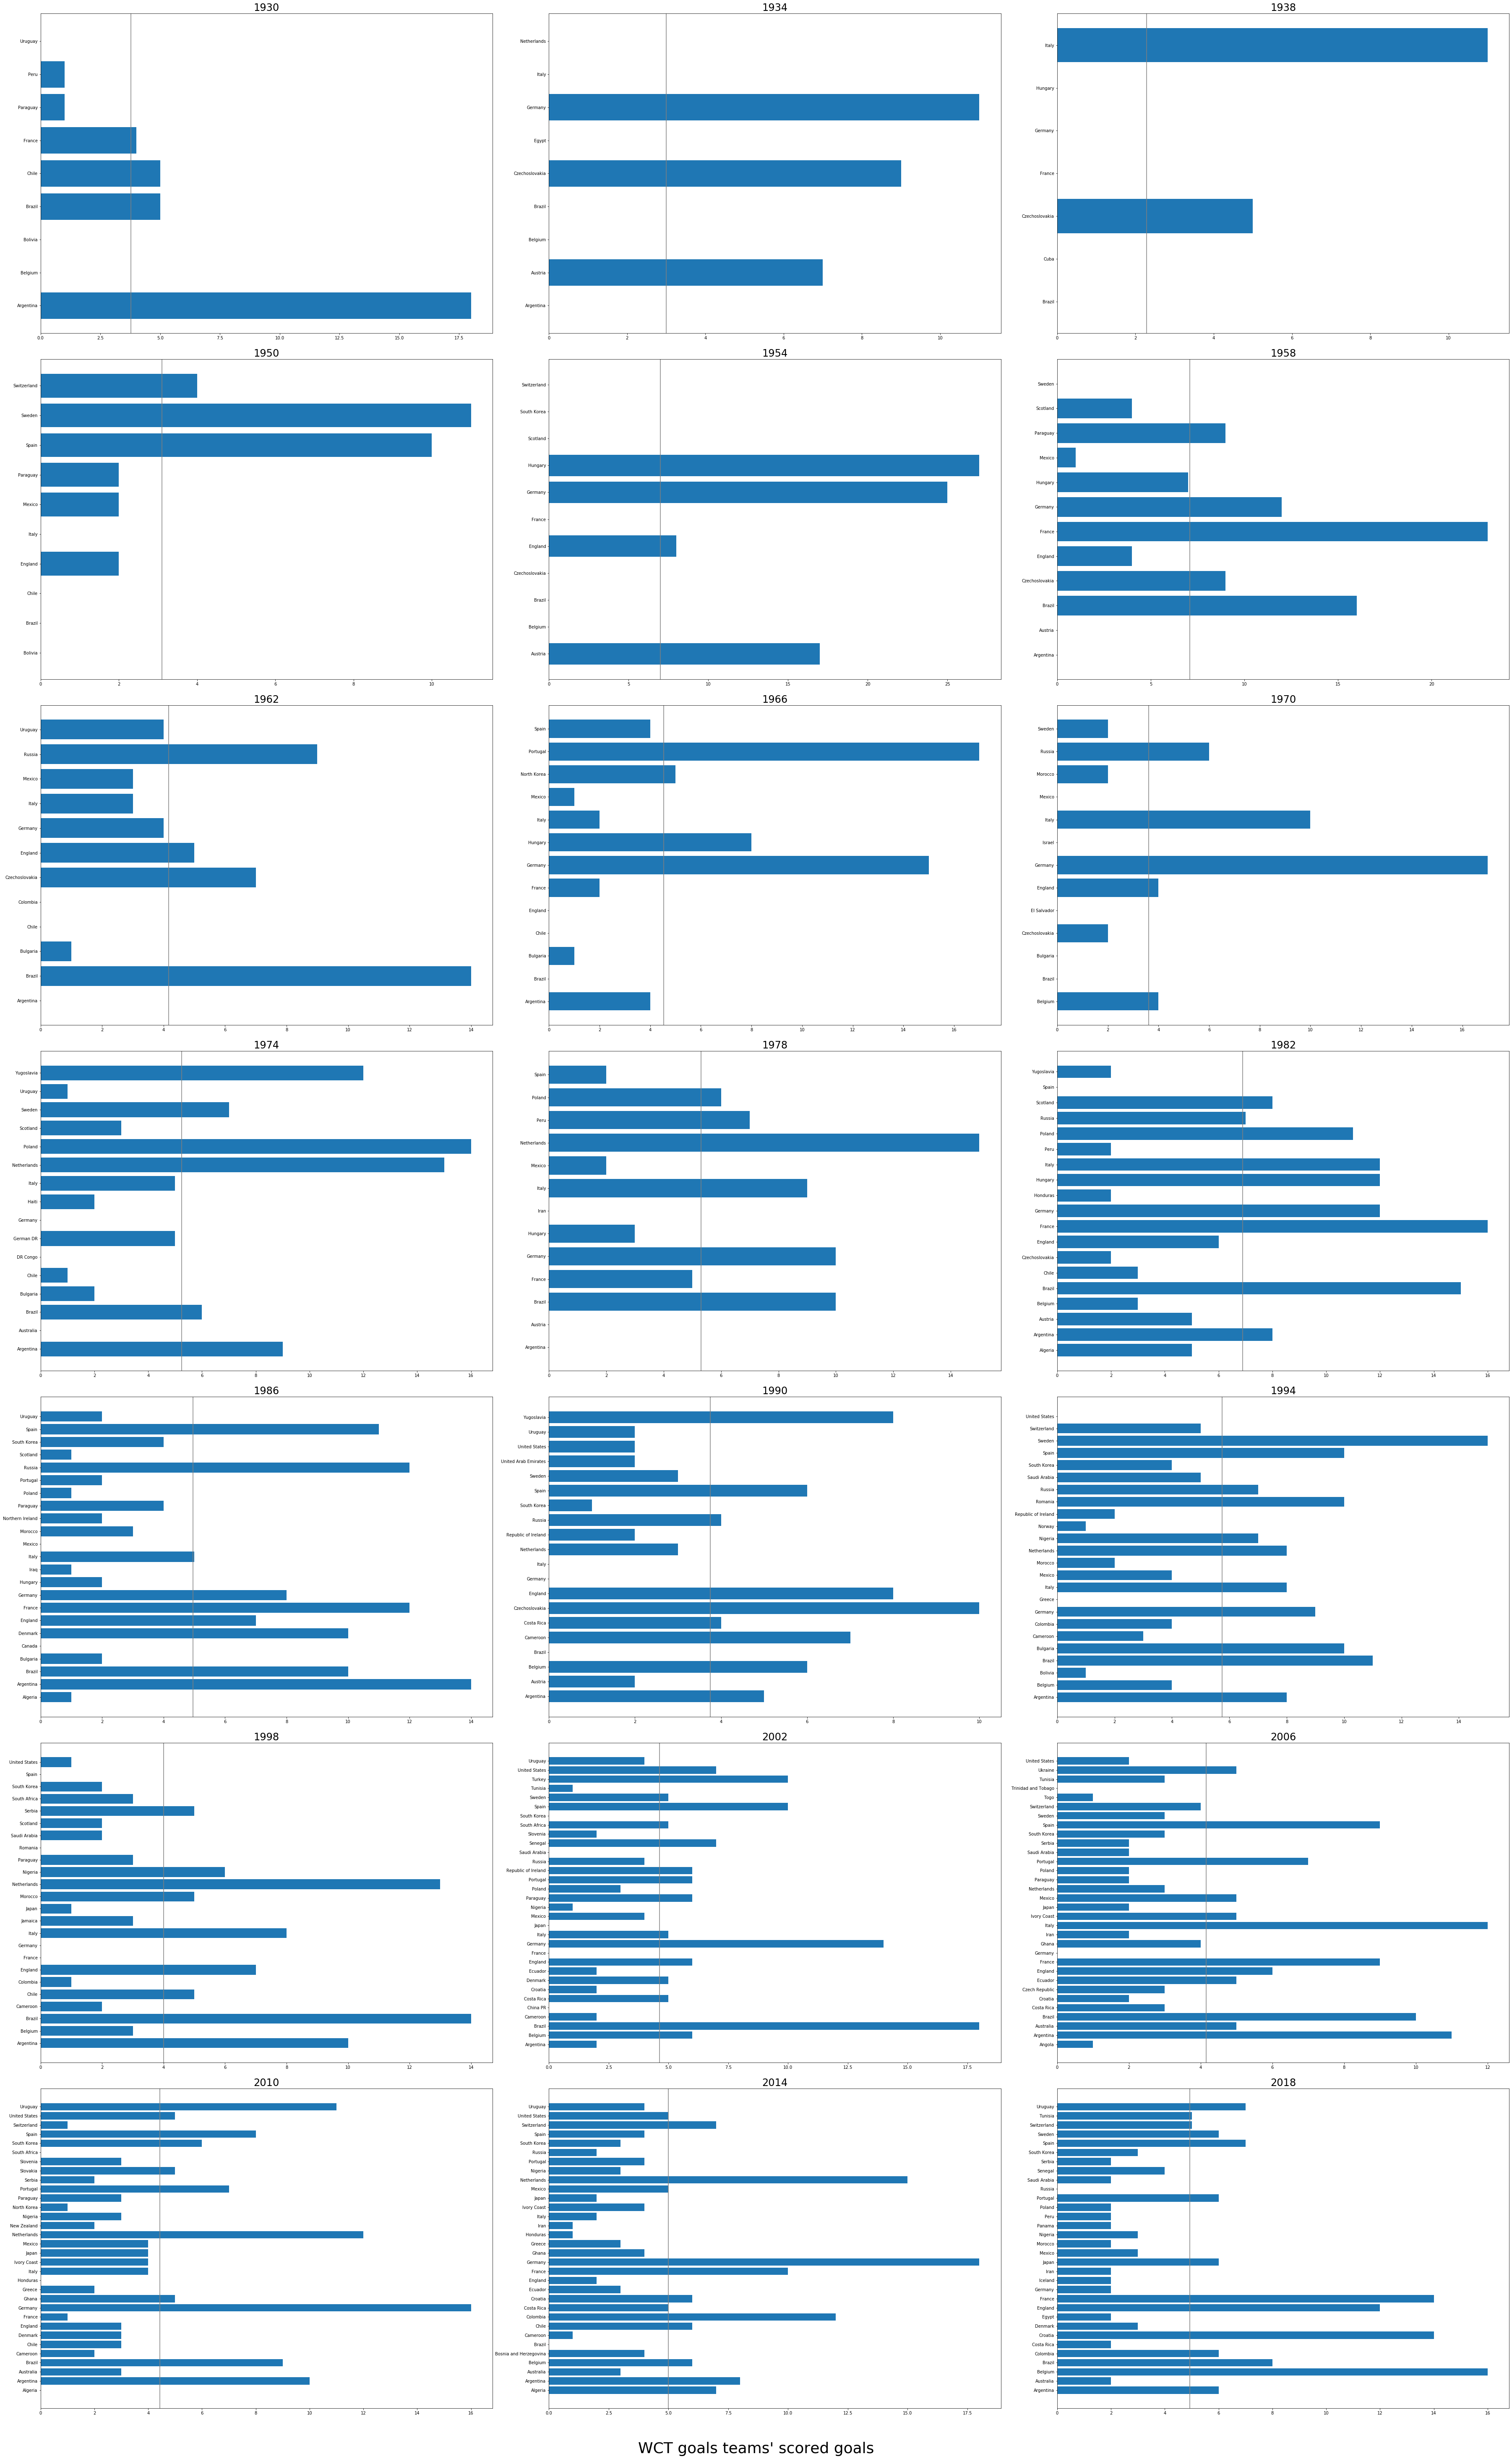

In [24]:
sbpl_one = project.rinaldi.subplots_genesis(df_read,"WCT goals")

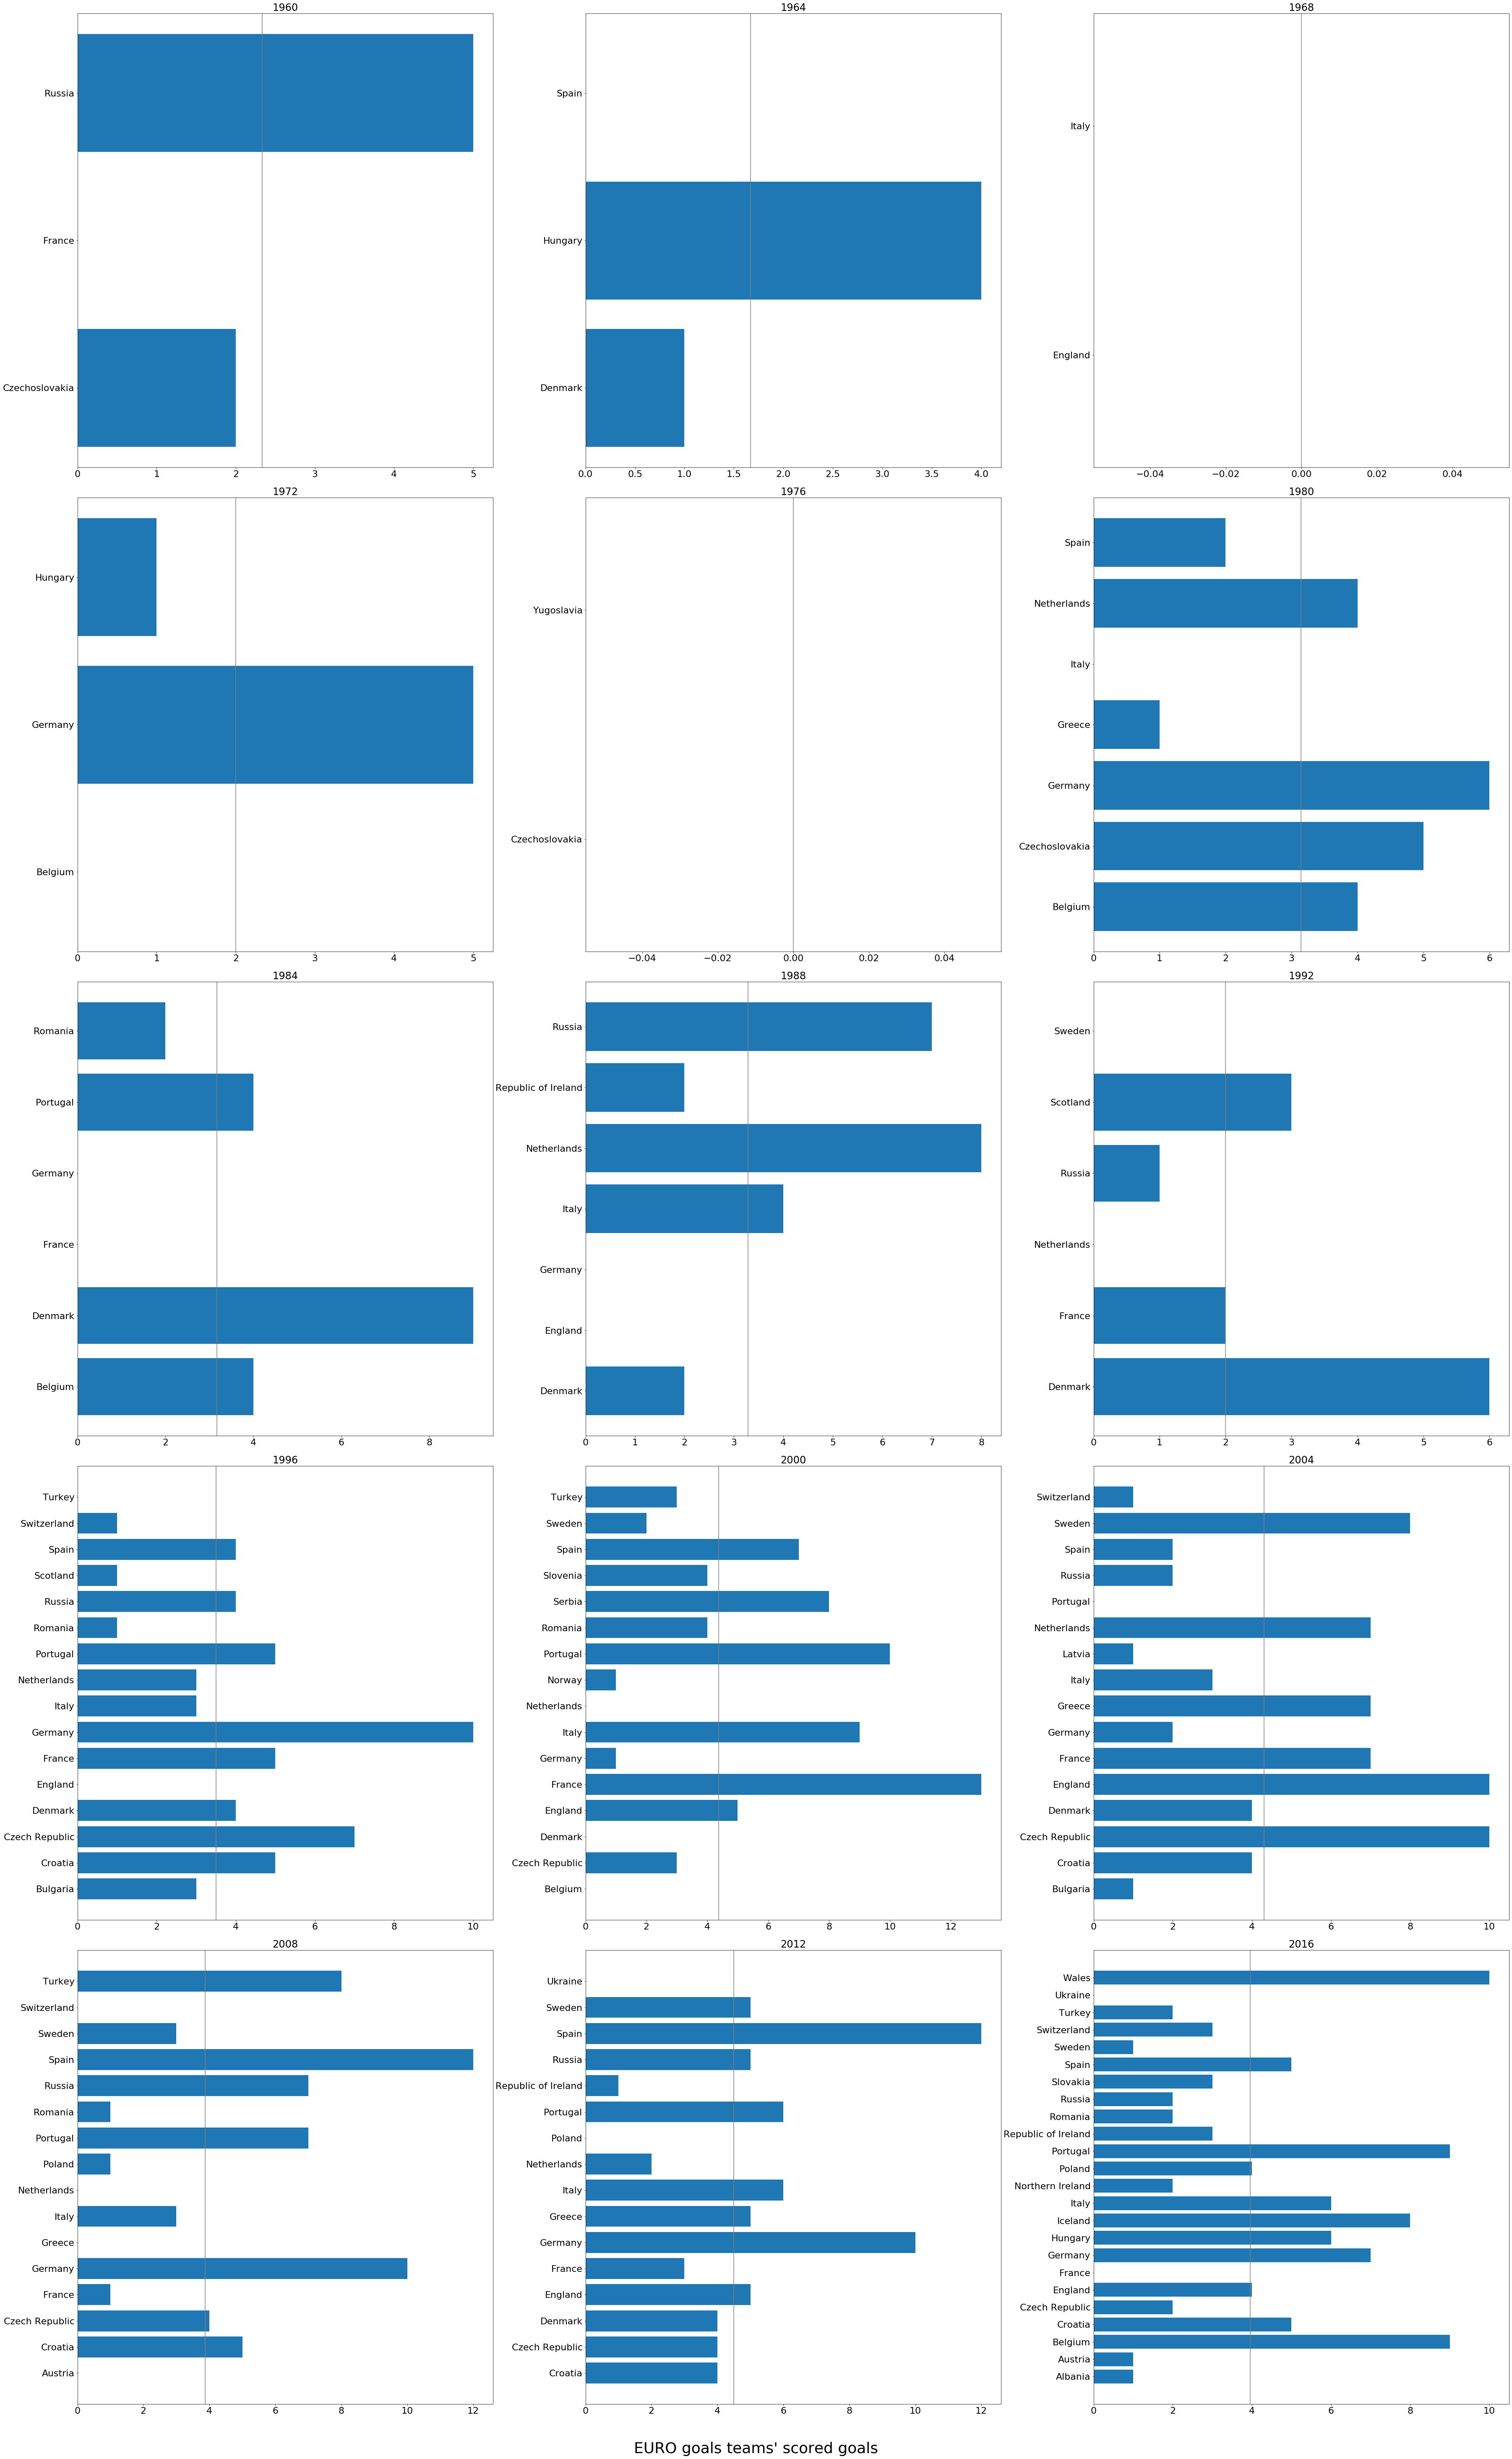

In [25]:
sbpl_two = project.rinaldi.subplots_genesis(df_read,"EURO goals", "tournament", "UEFA Euro")

- qualora, per qualsiasi motivo o inavvertitamente, il file di configurazione generato al **punto 2** sia stato cancellato, la funzione *result_saving* non sarà in grado di trovare il percorso dove ricondurre il file.png per il salvataggio dei grafici e verrà sollevata la seguente eccezione:

In [26]:
sbpl_three = project.rinaldi.subplots_genesis(df_read, None, None, None)

ConfigurationParametersAbsent: Settings file to save analysis results parameters does not exist!!!
Make sure you have created it by using settings function